In [33]:
# base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib
%matplotlib inline

# display
from IPython.display import display

# autoreload
%load_ext autoreload
%autoreload 2

# warnings
import warnings
warnings.filterwarnings('ignore')

# fix random seed
from numpy.random import seed as set_random_seed
set_random_seed(42)

# explainability
import shap, lime, eli5
shap.initjs()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Experiment

In [34]:
from utils.metric_utils import HardMetric
from sklearn.metrics import f1_score

In [35]:
VALIDATION = False
SAMPLE = False
SAMPLE_FRAC = 0.3
final_metric = HardMetric(f1_score)

## Load data

In [36]:
train = pd.read_csv('data/train.csv',index_col = 'id')
test = pd.read_csv('data/test.csv',index_col = 'id')
data = pd.concat([train, test]).drop(columns = 'target')
sample_test = pd.read_csv('data/sample_submission.csv',index_col = 'id')

In [37]:
from sklearn.model_selection import train_test_split
if VALIDATION:
    if SAMPLE:
        data = train.sample(frac = SAMPLE_FRAC)
    else:
        data = train
    train, test = train_test_split(data, train_size=0.7, shuffle=True)
    y_test = test['target']
    test = test.drop(columns = 'target')
else:
    train = train.sample(frac = 1.)

In [38]:
train.shape, test.shape

((7613, 4), (3263, 3))

# Feature Extraction

In [39]:
from utils.feature_utils import *

## Keyword

In [40]:
from feature_extraction.keyword import process_keyword

keyword = data['keyword']
X_keyword = process_keyword(keyword)
X_keyword.sample(10)

,keyword_OH_ablaze,keyword_OH_accident,keyword_OH_aftershock,keyword_OH_airplane%20accident,keyword_OH_ambulance,keyword_OH_annihilated,keyword_OH_annihilation,keyword_OH_apocalypse,keyword_OH_armageddon,keyword_OH_army,...,keyword_OH_whirlwind,keyword_OH_wild%20fires,keyword_OH_wildfire,keyword_OH_windstorm,keyword_OH_wounded,keyword_OH_wounds,keyword_OH_wreck,keyword_OH_wreckage,keyword_OH_wrecked,keyword_isna
id,,,,,,,,,,,,,,,,,,,,,
7162,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5162,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3614,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3324,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5307,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5186,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1769,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
229,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
keyword.sample(10)

id
414                apocalypse
7566                 outbreak
9042     structural%20failure
2920                   danger
617                  arsonist
7938                rainstorm
3587                 desolate
10512                wildfire
2280             cliff%20fall
3090                   deaths
Name: keyword, dtype: object

## Text

In [42]:
from feature_extraction.text import *

text = data['text']
X_text = process_text(text)
X_text.sample(10)

,text_count_urls,text_count_large_words,text_count_small_words,text_count_words,text_count_large_words_frac,text_our,text_deeds,text_are,text_the,text_reason,...,text_begovic,text_reserve,text_hattrick,text_ebolaoutbreak,text_ala,text_rajman,text_hasaka,text_risen,text_fasteners,text_xrwn
id,,,,,,,,,,,,,,,,,,,,,
5232,0,3,5,12,0.247934,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9040,0,0,5,10,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7874,2,9,2,12,0.743802,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5866,0,0,7,10,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9755,1,4,11,20,0.199005,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5824,1,2,9,11,0.180180,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
672,0,1,23,27,0.036900,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
423,0,1,12,13,0.076336,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
733,1,10,6,18,0.552486,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
raw_vs_processed(text, preprocess_text).sample(10).apply(lambda s: s.apply(print), axis = 1)
pass

There is no greater tragedy than becoming comfortable with where you are in life.
there is no greater tragedy than becoming comfortable with where you are in life 
There is no greater tragedy than becoming comfortable with where you are in life.
there is no greater tragedy than becoming comfortable with where you are in life 
@benznibeadel_ hehe like u HAHAHA I'm kidding love u I'm gonna sleep na bc curfew ??
 benznibeadel  hehe like u hahaha i m kidding love u i m gonna sleep na bc curfew   
Don't let #WMATA #Metro derail your day! Get a text every morn when you wake up with the best route to work: http://t.co/uhl0aKfvSm #sms
don t let  wmata  metro derail your day  get a text every morn when you wake up with the best route to work    sms
wo Pic of 16yr old PKK suicide bomber who detonated bomb in Turkey Army trench released http://t.co/Sj57BoKsiB /'/'//
wo pic of   old pkk suicide bomber who detonated bomb in turkey army trench released        
It doesn't get any closer. Heavy rain j

## location

In [44]:
from feature_extraction.location import process_location, preprocess_location

location = data['location']
X_location = process_location(location)
X_location.sample(10)

,location_nan,location_birmingham,location_est,location_september,location_bristol,location_estonia,location_africa,location_philadelphia,location_pa,location_panama,...,location_lesotho,location_inwood,location_would,location_rather,location_philippians,location_deep,location_libland,location_reiss,location_acey,location_islanddåçtorontoåè
id,,,,,,,,,,,,,,,,,,,,,
10413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
raw_vs_processed(location, preprocess_location).sample(10)

,raw,process
id,,
10843,NaN,nan
1386,New York,new york
9372,Tn,tn tunisia
3720,Nigeria,nigeria
3318,NaN,nan
1876,NaN,nan
6256,Brazil,brazil
2718,NaN,nan
3441,NaN,nan


## combine

In [46]:
X_all = X_keyword.join(X_text).join(X_location)

X_train = X_all.loc[train.index]
y_train = train['target']
X_test = X_all.loc[test.index]

# Feature Selection

In [15]:
from feature_selection.feature_selection import select_features

final_cols = select_features(X_train, y_train)
X_train = X_train[final_cols]
X_test = X_test[final_cols]

# Modeling

In [17]:
from models import *

In [18]:
# clf = LogisticModel(max_iter = 1000, C=0.8)

# clf = LGBMModel(n_estimators=10, max_depth=5, colsample_bytree=0.2)

# clf = XGBModel(n_estimators=30, max_depth=5, colsample_bytree=0.8)

# clf = SkorchModel(n_features)

# clf = KerasModel()

## ensemble

In [19]:
# from sklearn.ensemble import StackingClassifier
# from utils.model_utils import EnsembleClassifier

# base_estimators = [
#     ('logistic', LogisticRegression(max_iter=1000, C = 0.1, solver = 'lbfgs')), 
#     ('lgbm', LGBMClassifier(**{'n_estimators': 100, 'max_depth': 5, 'colsample_bytree': 0.8}))
# ]
# clf = StackingClassifier(base_estimators, final_estimator = LGBMClassifier(n_estimators=10), stack_method='predict_proba')

## Optuna

In [27]:
from models import *

from models.optuna import OptunaCV
clf = OptunaCV.optimize(
    X_train,
    y_train,
    estimators= [XGBModel],
    metric=final_metric,
    n_trials = 200,
    n_jobs = 5
)

[W 2021-02-16 15:35:06,053] Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'models.xgboost.XGBModel'> which is of type ABCMeta.
[I 2021-02-16 15:35:31,633] Finished trial#0 resulted in value: 0.696584058941728. Current best value is 0.696584058941728 with parameters: {'classifier': <class 'models.xgboost.XGBModel'>, 'booster': 'gbtree', 'lambda': 0.12051884732727834, 'alpha': 6.029824670142518e-06, 'max_depth': 1, 'eta': 0.0002710494702806636, 'gamma': 8.480990157703969e-06, 'grow_policy': 'lossguide'}.
[W 2021-02-16 15:35:31,633] Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'models.xgboost.XGBModel'> which is of type ABCMeta.
[I 2021-02-16 15:36:07,851] Finished trial#1 resulted in value: 0.6988679245283018. Current best value is 0.6988679245283018 with parameters: {'classifier': <class 'models.xgboost.XGBModel'

[W 2021-02-16 15:45:36,438] Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'models.xgboost.XGBModel'> which is of type ABCMeta.
[I 2021-02-16 15:46:02,781] Finished trial#13 resulted in value: 0.686204431736955. Current best value is 0.7280832095096582 with parameters: {'classifier': <class 'models.xgboost.XGBModel'>, 'booster': 'dart', 'lambda': 3.479622530338416e-07, 'alpha': 0.048483701368179956, 'max_depth': 7, 'eta': 0.009145491239252228, 'gamma': 9.045951516744111e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 0.0005025610164064183, 'skip_drop': 0.0027527794552658627}.
[W 2021-02-16 15:46:02,784] Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'models.xgboost.XGBModel'> which is of type ABCMeta.
[I 2021-02-16 15:46:59,968] Finished trial#14 resulted in value: 

[I 2021-02-16 15:57:35,579] Finished trial#27 resulted in value: 0.7185385656292288. Current best value is 0.7399425287356322 with parameters: {'classifier': <class 'models.xgboost.XGBModel'>, 'booster': 'dart', 'lambda': 3.0120614896606965e-07, 'alpha': 1.5964397219870453e-07, 'max_depth': 8, 'eta': 1.541024343809041e-05, 'gamma': 5.187013408181153e-06, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 0.014136353805240887, 'skip_drop': 0.005093710640971139}.
[W 2021-02-16 15:57:35,579] Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'models.xgboost.XGBModel'> which is of type ABCMeta.
[I 2021-02-16 15:59:04,374] Finished trial#28 resulted in value: 0.7336612789880533. Current best value is 0.7399425287356322 with parameters: {'classifier': <class 'models.xgboost.XGBModel'>, 'booster': 'dart', 'lambda': 3.0120614896606965e-07, 'alpha': 1.5964397219870453e-07

[I 2021-02-16 16:12:50,432] Finished trial#38 resulted in value: 0.7188365650969529. Current best value is 0.753721244925575 with parameters: {'classifier': <class 'models.xgboost.XGBModel'>, 'booster': 'dart', 'lambda': 2.1151817391473565e-07, 'alpha': 8.989651706300229e-08, 'max_depth': 6, 'eta': 2.5477535545774184e-07, 'gamma': 3.3389267233549624e-07, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 2.3042355212467574e-05, 'skip_drop': 0.0009248593540807019}.
[W 2021-02-16 16:12:50,432] Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'models.xgboost.XGBModel'> which is of type ABCMeta.
[I 2021-02-16 16:13:38,573] Finished trial#39 resulted in value: 0.7097532314923619. Current best value is 0.753721244925575 with parameters: {'classifier': <class 'models.xgboost.XGBModel'>, 'booster': 'dart', 'lambda': 2.1151817391473565e-07, 'alpha': 8.989651706300229e-0

[I 2021-02-16 16:28:20,142] Finished trial#49 resulted in value: 0.7212863705972434. Current best value is 0.753721244925575 with parameters: {'classifier': <class 'models.xgboost.XGBModel'>, 'booster': 'dart', 'lambda': 2.1151817391473565e-07, 'alpha': 8.989651706300229e-08, 'max_depth': 6, 'eta': 2.5477535545774184e-07, 'gamma': 3.3389267233549624e-07, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 2.3042355212467574e-05, 'skip_drop': 0.0009248593540807019}.
[W 2021-02-16 16:28:20,142] Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'models.xgboost.XGBModel'> which is of type ABCMeta.
[I 2021-02-16 16:29:08,312] Finished trial#50 resulted in value: 0.7243460764587526. Current best value is 0.753721244925575 with parameters: {'classifier': <class 'models.xgboost.XGBModel'>, 'booster': 'dart', 'lambda': 2.1151817391473565e-07, 'alpha': 8.989651706300229e-0

[I 2021-02-16 16:43:24,388] Finished trial#60 resulted in value: 0.7216196673897325. Current best value is 0.753721244925575 with parameters: {'classifier': <class 'models.xgboost.XGBModel'>, 'booster': 'dart', 'lambda': 2.1151817391473565e-07, 'alpha': 8.989651706300229e-08, 'max_depth': 6, 'eta': 2.5477535545774184e-07, 'gamma': 3.3389267233549624e-07, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 2.3042355212467574e-05, 'skip_drop': 0.0009248593540807019}.
[W 2021-02-16 16:43:24,390] Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'models.xgboost.XGBModel'> which is of type ABCMeta.
[I 2021-02-16 16:45:17,097] Finished trial#61 resulted in value: 0.7256371814092953. Current best value is 0.753721244925575 with parameters: {'classifier': <class 'models.xgboost.XGBModel'>, 'booster': 'dart', 'lambda': 2.1151817391473565e-07, 'alpha': 8.989651706300229e-0

[I 2021-02-16 17:00:34,565] Finished trial#71 resulted in value: 0.7049300956585726. Current best value is 0.753721244925575 with parameters: {'classifier': <class 'models.xgboost.XGBModel'>, 'booster': 'dart', 'lambda': 2.1151817391473565e-07, 'alpha': 8.989651706300229e-08, 'max_depth': 6, 'eta': 2.5477535545774184e-07, 'gamma': 3.3389267233549624e-07, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 2.3042355212467574e-05, 'skip_drop': 0.0009248593540807019}.
[W 2021-02-16 17:00:34,565] Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'models.xgboost.XGBModel'> which is of type ABCMeta.
[I 2021-02-16 17:01:55,617] Finished trial#72 resulted in value: 0.7325335215243471. Current best value is 0.753721244925575 with parameters: {'classifier': <class 'models.xgboost.XGBModel'>, 'booster': 'dart', 'lambda': 2.1151817391473565e-07, 'alpha': 8.989651706300229e-0

[I 2021-02-16 17:15:06,352] Finished trial#82 resulted in value: 0.7178789938817132. Current best value is 0.753721244925575 with parameters: {'classifier': <class 'models.xgboost.XGBModel'>, 'booster': 'dart', 'lambda': 2.1151817391473565e-07, 'alpha': 8.989651706300229e-08, 'max_depth': 6, 'eta': 2.5477535545774184e-07, 'gamma': 3.3389267233549624e-07, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 2.3042355212467574e-05, 'skip_drop': 0.0009248593540807019}.
[W 2021-02-16 17:15:06,352] Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'models.xgboost.XGBModel'> which is of type ABCMeta.
[I 2021-02-16 17:16:05,027] Finished trial#83 resulted in value: 0.7212643678160919. Current best value is 0.753721244925575 with parameters: {'classifier': <class 'models.xgboost.XGBModel'>, 'booster': 'dart', 'lambda': 2.1151817391473565e-07, 'alpha': 8.989651706300229e-0

[I 2021-02-16 17:29:27,211] Finished trial#93 resulted in value: 0.7263157894736842. Current best value is 0.753721244925575 with parameters: {'classifier': <class 'models.xgboost.XGBModel'>, 'booster': 'dart', 'lambda': 2.1151817391473565e-07, 'alpha': 8.989651706300229e-08, 'max_depth': 6, 'eta': 2.5477535545774184e-07, 'gamma': 3.3389267233549624e-07, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 2.3042355212467574e-05, 'skip_drop': 0.0009248593540807019}.
[W 2021-02-16 17:29:27,211] Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'models.xgboost.XGBModel'> which is of type ABCMeta.
[I 2021-02-16 17:30:47,115] Finished trial#94 resulted in value: 0.7150537634408602. Current best value is 0.753721244925575 with parameters: {'classifier': <class 'models.xgboost.XGBModel'>, 'booster': 'dart', 'lambda': 2.1151817391473565e-07, 'alpha': 8.989651706300229e-0

[I 2021-02-16 17:44:43,206] Finished trial#104 resulted in value: 0.732740943267259. Current best value is 0.753721244925575 with parameters: {'classifier': <class 'models.xgboost.XGBModel'>, 'booster': 'dart', 'lambda': 2.1151817391473565e-07, 'alpha': 8.989651706300229e-08, 'max_depth': 6, 'eta': 2.5477535545774184e-07, 'gamma': 3.3389267233549624e-07, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 2.3042355212467574e-05, 'skip_drop': 0.0009248593540807019}.
[W 2021-02-16 17:44:43,206] Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'models.xgboost.XGBModel'> which is of type ABCMeta.
[I 2021-02-16 17:46:13,866] Finished trial#105 resulted in value: 0.7036247334754798. Current best value is 0.753721244925575 with parameters: {'classifier': <class 'models.xgboost.XGBModel'>, 'booster': 'dart', 'lambda': 2.1151817391473565e-07, 'alpha': 8.989651706300229e-

[I 2021-02-16 18:01:21,101] Finished trial#115 resulted in value: 0.7267721954576739. Current best value is 0.753721244925575 with parameters: {'classifier': <class 'models.xgboost.XGBModel'>, 'booster': 'dart', 'lambda': 2.1151817391473565e-07, 'alpha': 8.989651706300229e-08, 'max_depth': 6, 'eta': 2.5477535545774184e-07, 'gamma': 3.3389267233549624e-07, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 2.3042355212467574e-05, 'skip_drop': 0.0009248593540807019}.
[W 2021-02-16 18:01:21,103] Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'models.xgboost.XGBModel'> which is of type ABCMeta.
[I 2021-02-16 18:03:21,964] Finished trial#116 resulted in value: 0.7320807237299931. Current best value is 0.753721244925575 with parameters: {'classifier': <class 'models.xgboost.XGBModel'>, 'booster': 'dart', 'lambda': 2.1151817391473565e-07, 'alpha': 8.989651706300229e

[I 2021-02-16 18:18:27,184] Finished trial#126 resulted in value: 0.7099697885196375. Current best value is 0.753721244925575 with parameters: {'classifier': <class 'models.xgboost.XGBModel'>, 'booster': 'dart', 'lambda': 2.1151817391473565e-07, 'alpha': 8.989651706300229e-08, 'max_depth': 6, 'eta': 2.5477535545774184e-07, 'gamma': 3.3389267233549624e-07, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 2.3042355212467574e-05, 'skip_drop': 0.0009248593540807019}.
[W 2021-02-16 18:18:27,184] Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'models.xgboost.XGBModel'> which is of type ABCMeta.
[I 2021-02-16 18:19:47,648] Finished trial#127 resulted in value: 0.7347204161248374. Current best value is 0.753721244925575 with parameters: {'classifier': <class 'models.xgboost.XGBModel'>, 'booster': 'dart', 'lambda': 2.1151817391473565e-07, 'alpha': 8.989651706300229e

[I 2021-02-16 18:32:49,526] Finished trial#137 resulted in value: 0.7423103212576898. Current best value is 0.753721244925575 with parameters: {'classifier': <class 'models.xgboost.XGBModel'>, 'booster': 'dart', 'lambda': 2.1151817391473565e-07, 'alpha': 8.989651706300229e-08, 'max_depth': 6, 'eta': 2.5477535545774184e-07, 'gamma': 3.3389267233549624e-07, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 2.3042355212467574e-05, 'skip_drop': 0.0009248593540807019}.
[W 2021-02-16 18:32:49,528] Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'models.xgboost.XGBModel'> which is of type ABCMeta.
[I 2021-02-16 18:34:09,218] Finished trial#138 resulted in value: 0.7326007326007327. Current best value is 0.753721244925575 with parameters: {'classifier': <class 'models.xgboost.XGBModel'>, 'booster': 'dart', 'lambda': 2.1151817391473565e-07, 'alpha': 8.989651706300229e

[I 2021-02-16 18:47:51,432] Finished trial#148 resulted in value: 0.733774834437086. Current best value is 0.753721244925575 with parameters: {'classifier': <class 'models.xgboost.XGBModel'>, 'booster': 'dart', 'lambda': 2.1151817391473565e-07, 'alpha': 8.989651706300229e-08, 'max_depth': 6, 'eta': 2.5477535545774184e-07, 'gamma': 3.3389267233549624e-07, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 2.3042355212467574e-05, 'skip_drop': 0.0009248593540807019}.
[W 2021-02-16 18:47:51,432] Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'models.xgboost.XGBModel'> which is of type ABCMeta.
[I 2021-02-16 18:49:13,413] Finished trial#149 resulted in value: 0.7186091435930457. Current best value is 0.753721244925575 with parameters: {'classifier': <class 'models.xgboost.XGBModel'>, 'booster': 'dart', 'lambda': 2.1151817391473565e-07, 'alpha': 8.989651706300229e-

[I 2021-02-16 19:03:11,353] Finished trial#159 resulted in value: 0.7342281879194631. Current best value is 0.753721244925575 with parameters: {'classifier': <class 'models.xgboost.XGBModel'>, 'booster': 'dart', 'lambda': 2.1151817391473565e-07, 'alpha': 8.989651706300229e-08, 'max_depth': 6, 'eta': 2.5477535545774184e-07, 'gamma': 3.3389267233549624e-07, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 2.3042355212467574e-05, 'skip_drop': 0.0009248593540807019}.
[W 2021-02-16 19:03:11,355] Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'models.xgboost.XGBModel'> which is of type ABCMeta.
[I 2021-02-16 19:04:21,126] Finished trial#160 resulted in value: 0.732080723729993. Current best value is 0.753721244925575 with parameters: {'classifier': <class 'models.xgboost.XGBModel'>, 'booster': 'dart', 'lambda': 2.1151817391473565e-07, 'alpha': 8.989651706300229e-

[I 2021-02-16 19:18:56,651] Finished trial#170 resulted in value: 0.7398030942334739. Current best value is 0.753721244925575 with parameters: {'classifier': <class 'models.xgboost.XGBModel'>, 'booster': 'dart', 'lambda': 2.1151817391473565e-07, 'alpha': 8.989651706300229e-08, 'max_depth': 6, 'eta': 2.5477535545774184e-07, 'gamma': 3.3389267233549624e-07, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 2.3042355212467574e-05, 'skip_drop': 0.0009248593540807019}.
[W 2021-02-16 19:18:56,651] Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'models.xgboost.XGBModel'> which is of type ABCMeta.
[I 2021-02-16 19:20:28,096] Finished trial#171 resulted in value: 0.7339201083276913. Current best value is 0.753721244925575 with parameters: {'classifier': <class 'models.xgboost.XGBModel'>, 'booster': 'dart', 'lambda': 2.1151817391473565e-07, 'alpha': 8.989651706300229e

[I 2021-02-16 19:35:01,690] Finished trial#181 resulted in value: 0.7405828002842927. Current best value is 0.753721244925575 with parameters: {'classifier': <class 'models.xgboost.XGBModel'>, 'booster': 'dart', 'lambda': 2.1151817391473565e-07, 'alpha': 8.989651706300229e-08, 'max_depth': 6, 'eta': 2.5477535545774184e-07, 'gamma': 3.3389267233549624e-07, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 2.3042355212467574e-05, 'skip_drop': 0.0009248593540807019}.
[W 2021-02-16 19:35:01,692] Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'models.xgboost.XGBModel'> which is of type ABCMeta.
[I 2021-02-16 19:36:21,169] Finished trial#182 resulted in value: 0.7251631617113851. Current best value is 0.753721244925575 with parameters: {'classifier': <class 'models.xgboost.XGBModel'>, 'booster': 'dart', 'lambda': 2.1151817391473565e-07, 'alpha': 8.989651706300229e

[I 2021-02-16 19:50:32,780] Finished trial#192 resulted in value: 0.6793145654834762. Current best value is 0.753721244925575 with parameters: {'classifier': <class 'models.xgboost.XGBModel'>, 'booster': 'dart', 'lambda': 2.1151817391473565e-07, 'alpha': 8.989651706300229e-08, 'max_depth': 6, 'eta': 2.5477535545774184e-07, 'gamma': 3.3389267233549624e-07, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 2.3042355212467574e-05, 'skip_drop': 0.0009248593540807019}.
[W 2021-02-16 19:50:32,780] Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'models.xgboost.XGBModel'> which is of type ABCMeta.
[I 2021-02-16 19:51:53,137] Finished trial#193 resulted in value: 0.699558173784978. Current best value is 0.753721244925575 with parameters: {'classifier': <class 'models.xgboost.XGBModel'>, 'booster': 'dart', 'lambda': 2.1151817391473565e-07, 'alpha': 8.989651706300229e-

0.753721244925575


In [47]:
clf

XGBModel(base_score=0.5, booster='dart', colsample_bylevel=1,
         colsample_bynode=1, colsample_bytree=1, gamma=3.3389267233549624e-07,
         gpu_id=-1, importance_type='gain', interaction_constraints=None,
         learning_rate=0.300000012, max_delta_step=0, max_depth=6,
         min_child_weight=1, missing=nan, monotone_constraints=None,
         n_estimators=100, n_jobs=0, num_parallel_tree=1,
         objective='binary:logistic', random_state=0, reg_alpha=0, reg_lambda=1,
         scale_pos_weight=1, subsample=1, tree_method=None,
         validate_parameters=False, verbosity=None)

## Fitting

In [48]:
clf.fit(X_train,y_train)
y_train_pred_score = clf.predict_proba(X_train)[:, 1]
y_pred_score = clf.predict_proba(X_test)[:, 1]
th = 0.5

### Threshold choosing

In [49]:
from sklearn.model_selection import cross_val_predict
from utils.cv_utils import cross_val_predict_proba

xx_train, xx_val, yy_train, yy_val = train_test_split(X_train, y_train, train_size=0.7, shuffle=True)

clf.fit(xx_train,yy_train)
yy_val_pred_score = clf.predict_proba(xx_val)[:, 1]
th = final_metric.get_thresh(yy_val, yy_val_pred_score)
print(f'threshold changed to {th}')

threshold changed to 0.344


### predict

In [50]:
y_pred = (y_pred_score > th).astype(int)
y_train_pred = (y_train_pred_score > th).astype(int)

# (Validation) Evaluation

In [51]:
if VALIDATION:
    from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, plot_roc_curve, plot_confusion_matrix, plot_precision_recall_curve
    import matplotlib.pyplot as plt
    print(f'train score:\t {final_metric.metric(y_train, y_train_pred)}')
    print(f'test score:\t {final_metric.metric(y_test, y_pred)}')
    plot_roc_curve(clf, X_train, y_train, name='train')
    plot_roc_curve(clf, X_test, y_test, name='val', ax = plt.gca())
    plot_precision_recall_curve(clf, X_train, y_train, name='train')
    plot_precision_recall_curve(clf, X_test, y_test, name='val', ax = plt.gca())
    plot_confusion_matrix(clf, X_test, y_test)

# (Pred) Save Results

In [52]:
import datetime
if not VALIDATION:   
    current_time = str(datetime.datetime.now())[:-7].replace(' ', '__').replace('-', '_').replace(':', '_')
    final_result = pd.Series(data = y_pred, index = test.index, name='target').to_frame()
    final_result.to_csv(f'results/results_{current_time}.csv')

In [53]:
y_pred.sum(), y_pred.shape[0]

(1580, 3263)

# Feature Importances

## feature_importances_

In [54]:
clf.feature_importance(X_train.columns)

keyword_OH_ablaze     0.000000
text_mirrors          0.000000
text_freekashmir      0.000000
text_endconflict      0.000000
text_endoccupation    0.000000
                        ...   
text_has              0.009762
text_souda            0.011043
text_kylesalive       0.011422
text_selects          0.014097
text_count_urls       0.014208
Length: 23875, dtype: float32

## shap

In [63]:
explainer = shap.TreeExplainer(clf, X_train)
shap_values = explainer.shap_values(X_test)

In [64]:
idx = np.random.choice(X_test.shape[0], size = 1)
shap.force_plot(explainer.expected_value, shap_values[idx,:], X_test.iloc[idx], link="logit")

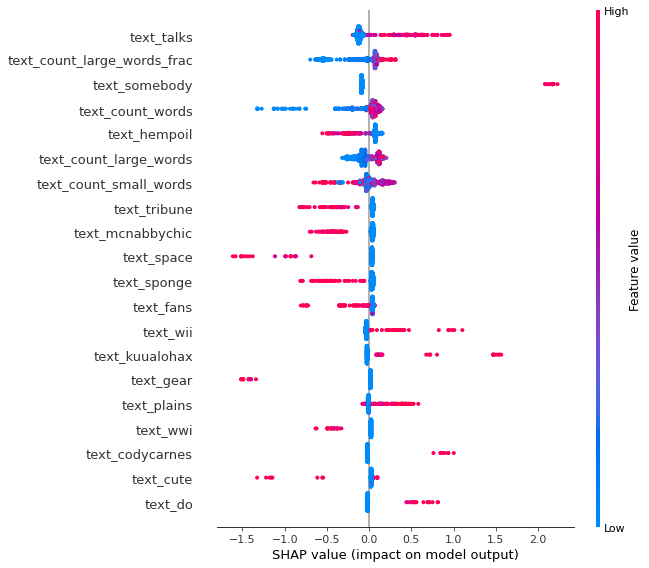

In [74]:
shap.summary_plot(shap_values, X_test)

# Error Analysis

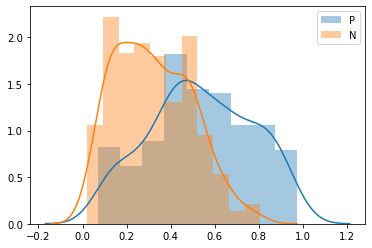

In [75]:
sns.distplot(y_pred_score[y_test==1], label = 'P')
sns.distplot(y_pred_score[y_test==0], label = 'N')
plt.legend()

In [86]:
top_FP = y_test[y_test==0].iloc[np.argpartition(y_pred_score[y_test==0], -4)[-4:][::-1]].index.tolist()
top_FN = y_test[y_test==1].iloc[np.argpartition(y_pred_score[y_test==1], 4)[:4]].index.tolist()

In [87]:
top_FP

[5342, 3833, 7244, 8320]

In [88]:
shap_values = {k: shap_values[idx,:] for idx, k in enumerate(X_test.index)}

TypeError: unhashable type: 'slice'

In [89]:
data.loc[top_FN]

,keyword,location,text,target
id,,,,
4895,explode,NaN,@allen_enbot If you mess up it's gonna explode...,1
3240,deluged,NaN,Businesses are deluged with invoices. Make you...,1
7183,mudslide,"London, England",@new_hart2010 #mudslide... nuff said #GBBO,1
3114,debris,"46.950109,7.439469",How Missing JetÛªs Debris Could Have Floated ...,1


In [90]:
ididid = top_FN[0]

In [94]:
data.loc[top_FN[1]].text

"Businesses are deluged with invoices. Make yours stand out with colour or shape and it's likely to rise to the top of t e pay' pileq"

In [92]:
X_test.loc[[top_FN[0]]]

,text_count_large_words,text_count_small_words,text_count_words,text_count_large_words_frac,text_its,text_left,text_to,text_if,text_follow,text_casualties,...,location_through,location_aracaju,location_sofa,location_upstate,location_clayton,location_dundalk,location_arvada,location_chandler,location_dani,location_vcu
id,,,,,,,,,,,,,,,,,,,,,
4895,1,6,8,0.123457,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
shap.force_plot(explainer.expected_value, shap_values[top_FN[0]], X_test.loc[[top_FN[0]]], link="logit")